I ran the following notebook in a docker container with the following commands:

```
docker pull bethgelab/jupyter-torch:ubuntu-14.04
docker run -it -v `pwd`:/space/ -p 8888:8888 --name keras -w /space/ --rm bethgelab/jupyter-torch:ubuntu-14.04 jupyter notebook --ip=0.0.0.0
```

The following code is adapted from http://pandas.pydata.org/pandas-docs/stable/10min.html

In [88]:
%%bash
pip install seaborn
pip install tables

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [90]:
import pandas as pd

In [91]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [92]:
dates = pd.date_range('20160101', periods=6)
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')

In [93]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2016-01-01,-1.721513,-1.307341,-1.305748,-1.606161
2016-01-02,1.881750,-0.774226,-0.438665,0.253949
2016-01-03,0.358899,0.264628,0.895745,-0.455152
2016-01-04,0.142235,0.081620,1.372600,-1.483999
2016-01-05,1.550251,-0.000631,-0.371845,0.471426
2016-01-06,0.447287,-1.970801,-0.748293,-0.851762


In [94]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["a","b","c", "d"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,a,foo
1,1.0,2013-01-02,1.0,3,b,foo
2,1.0,2013-01-02,1.0,3,c,foo
3,1.0,2013-01-02,1.0,3,d,foo


In [95]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [96]:
df.index, df.columns, df.values

(DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
                '2016-01-05', '2016-01-06'],
               dtype='datetime64[ns]', freq='D'),
 Index(['A', 'B', 'C', 'D'], dtype='object'),
 array([[ -1.72151336e+00,  -1.30734149e+00,  -1.30574783e+00,
          -1.60616090e+00],
        [  1.88174961e+00,  -7.74225716e-01,  -4.38664785e-01,
           2.53948591e-01],
        [  3.58898840e-01,   2.64628162e-01,   8.95744901e-01,
          -4.55151522e-01],
        [  1.42235439e-01,   8.16198564e-02,   1.37259985e+00,
          -1.48399929e+00],
        [  1.55025115e+00,  -6.30593310e-04,  -3.71845114e-01,
           4.71426275e-01],
        [  4.47287393e-01,  -1.97080141e+00,  -7.48292625e-01,
          -8.51762034e-01]]))

In [97]:
df2.index, df2.columns, df2.values

(Int64Index([0, 1, 2, 3], dtype='int64'),
 Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object'),
 array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'a', 'foo'],
        [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'b', 'foo'],
        [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'c', 'foo'],
        [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'd', 'foo']], dtype=object))

In [98]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.443152,-0.617792,-0.099368,-0.611950
std,1.271116,0.892112,1.022033,0.866545
min,-1.721513,-1.970801,-1.305748,-1.606161
25%,0.196401,-1.174063,-0.670886,-1.325940
50%,0.403093,-0.387428,-0.405255,-0.653457
75%,1.274510,0.061057,0.578847,0.076674
max,1.881750,0.264628,1.372600,0.471426


In [99]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [100]:
df.T

,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00
A,-1.721513,1.881750,0.358899,0.142235,1.550251,0.447287
B,-1.307341,-0.774226,0.264628,0.081620,-0.000631,-1.970801
C,-1.305748,-0.438665,0.895745,1.372600,-0.371845,-0.748293
D,-1.606161,0.253949,-0.455152,-1.483999,0.471426,-0.851762


In [101]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2016-01-01,-1.606161,-1.305748,-1.307341,-1.721513
2016-01-02,0.253949,-0.438665,-0.774226,1.881750
2016-01-03,-0.455152,0.895745,0.264628,0.358899
2016-01-04,-1.483999,1.372600,0.081620,0.142235
2016-01-05,0.471426,-0.371845,-0.000631,1.550251
2016-01-06,-0.851762,-0.748293,-1.970801,0.447287


In [102]:
df.sort_values(by='B')

,A,B,C,D
2016-01-06,0.447287,-1.970801,-0.748293,-0.851762
2016-01-01,-1.721513,-1.307341,-1.305748,-1.606161
2016-01-02,1.881750,-0.774226,-0.438665,0.253949
2016-01-05,1.550251,-0.000631,-0.371845,0.471426
2016-01-04,0.142235,0.081620,1.372600,-1.483999
2016-01-03,0.358899,0.264628,0.895745,-0.455152


In [103]:
df['A']

2016-01-01   -1.721513
2016-01-02    1.881750
2016-01-03    0.358899
2016-01-04    0.142235
2016-01-05    1.550251
2016-01-06    0.447287
Freq: D, Name: A, dtype: float64

In [104]:
df[0:3]

,A,B,C,D
2016-01-01,-1.721513,-1.307341,-1.305748,-1.606161
2016-01-02,1.881750,-0.774226,-0.438665,0.253949
2016-01-03,0.358899,0.264628,0.895745,-0.455152


In [105]:
df['20160102':'20160104']

,A,B,C,D
2016-01-02,1.881750,-0.774226,-0.438665,0.253949
2016-01-03,0.358899,0.264628,0.895745,-0.455152
2016-01-04,0.142235,0.081620,1.372600,-1.483999


In [106]:
df.loc[dates[2]]

A    0.358899
B    0.264628
C    0.895745
D   -0.455152
Name: 2016-01-03 00:00:00, dtype: float64

In [107]:
df.loc[:,['A','D']]

,A,D
2016-01-01,-1.721513,-1.606161
2016-01-02,1.881750,0.253949
2016-01-03,0.358899,-0.455152
2016-01-04,0.142235,-1.483999
2016-01-05,1.550251,0.471426
2016-01-06,0.447287,-0.851762


In [108]:
df.iloc[3:5,0:2]

,A,B
2016-01-04,0.142235,0.081620
2016-01-05,1.550251,-0.000631


In [109]:
df[df.A > 0.5]

,A,B,C,D
2016-01-02,1.881750,-0.774226,-0.438665,0.253949
2016-01-05,1.550251,-0.000631,-0.371845,0.471426


In [110]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2016-01-01,-1.721513,-1.307341,-1.305748,-1.606161,one
2016-01-02,1.881750,-0.774226,-0.438665,0.253949,one
2016-01-03,0.358899,0.264628,0.895745,-0.455152,two
2016-01-04,0.142235,0.081620,1.372600,-1.483999,three
2016-01-05,1.550251,-0.000631,-0.371845,0.471426,four
2016-01-06,0.447287,-1.970801,-0.748293,-0.851762,three


In [111]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2016-01-03,0.358899,0.264628,0.895745,-0.455152,two
2016-01-05,1.550251,-0.000631,-0.371845,0.471426,four


In [112]:
df['F'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20160101', periods=6))
df

,A,B,C,D,F
2016-01-01,-1.721513,-1.307341,-1.305748,-1.606161,1
2016-01-02,1.881750,-0.774226,-0.438665,0.253949,2
2016-01-03,0.358899,0.264628,0.895745,-0.455152,3
2016-01-04,0.142235,0.081620,1.372600,-1.483999,4
2016-01-05,1.550251,-0.000631,-0.371845,0.471426,5
2016-01-06,0.447287,-1.970801,-0.748293,-0.851762,6


In [113]:
df.at[dates[0],'A'] = 0.456
df.at[dates[0],'A']

0.45600000000000002

In [114]:
df.iat[0,1] = 0.123
df.iat[0,1]

0.123

In [115]:
df.loc[:,'D'] = np.array([5] * len(df))
df.loc[:,'D']

2016-01-01    5
2016-01-02    5
2016-01-03    5
2016-01-04    5
2016-01-05    5
2016-01-06    5
Freq: D, Name: D, dtype: int64

In [116]:
df.loc[:,'B':'D'] = np.random.randn(len(df), 3)
df.loc[:,'B':'D']

,B,C,D
2016-01-01,-0.528505,1.153989,1.135258
2016-01-02,2.259813,-0.162225,1.766412
2016-01-03,0.554258,0.570377,-0.682408
2016-01-04,0.278145,0.242004,-1.421892
2016-01-05,0.279067,0.485066,0.765222
2016-01-06,-0.670964,-2.440296,2.149373


In [117]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[:, 'E'] = np.random.randn(len(df1))
df1

,A,B,C,D,F,E
2016-01-01,0.456000,-0.528505,1.153989,1.135258,1,1.648395
2016-01-02,1.881750,2.259813,-0.162225,1.766412,2,1.286569
2016-01-03,0.358899,0.554258,0.570377,-0.682408,3,-0.532286
2016-01-04,0.142235,0.278145,0.242004,-1.421892,4,0.248808


In [118]:
df1.iloc[1,5] = np.nan
df1.dropna(how='any')

,A,B,C,D,F,E
2016-01-01,0.456000,-0.528505,1.153989,1.135258,1,1.648395
2016-01-03,0.358899,0.554258,0.570377,-0.682408,3,-0.532286
2016-01-04,0.142235,0.278145,0.242004,-1.421892,4,0.248808


In [119]:
df1.iloc[1,5] = np.nan
df1.fillna(value=5)

,A,B,C,D,F,E
2016-01-01,0.456000,-0.528505,1.153989,1.135258,1,1.648395
2016-01-02,1.881750,2.259813,-0.162225,1.766412,2,5.000000
2016-01-03,0.358899,0.554258,0.570377,-0.682408,3,-0.532286
2016-01-04,0.142235,0.278145,0.242004,-1.421892,4,0.248808


In [120]:
pd.isnull(df1)

,A,B,C,D,F,E
2016-01-01,False,False,False,False,False,False
2016-01-02,False,False,False,False,False,True
2016-01-03,False,False,False,False,False,False
2016-01-04,False,False,False,False,False,False


In [121]:
df.median()

A    0.451644
B    0.278606
C    0.363535
D    0.950240
F    3.500000
dtype: float64

In [122]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2016-01-01    NaN
2016-01-02    NaN
2016-01-03    1.0
2016-01-04    3.0
2016-01-05    5.0
2016-01-06    NaN
Freq: D, dtype: float64

In [123]:
df.sub(s, axis='index')

,A,B,C,D,F
2016-01-01,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN
2016-01-03,-0.641101,-0.445742,-0.429623,-1.682408,2.0
2016-01-04,-2.857765,-2.721855,-2.757996,-4.421892,1.0
2016-01-05,-3.449749,-4.720933,-4.514934,-4.234778,0.0
2016-01-06,NaN,NaN,NaN,NaN,NaN


In [124]:
df.apply(np.cumsum)

,A,B,C,D,F
2016-01-01,0.456000,-0.528505,1.153989,1.135258,1
2016-01-02,2.337750,1.731308,0.991763,2.901671,3
2016-01-03,2.696648,2.285566,1.562141,2.219263,6
2016-01-04,2.838884,2.563712,1.804145,0.797370,10
2016-01-05,4.389135,2.842779,2.289211,1.562593,15
2016-01-06,4.836422,2.171814,-0.151085,3.711965,21


In [125]:
a = np.array([[1,2,3], [4,5,6]])
np.cumsum(a,axis=0)      # sum over rows for each of the 3 columns

array([[1, 2, 3],
       [5, 7, 9]])

In [126]:
np.cumsum(a,axis=1)      # sum over columns for each of the 2 rows

array([[ 1,  3,  6],
       [ 4,  9, 15]])

In [127]:
df.apply(lambda x: (x.max(),  x.min()))

A    (1.88174961073, 0.142235439112)
B    (2.25981291906, -0.67096427896)
C    (1.15398856063, -2.44029631817)
D    (2.14937280418, -1.42189242236)
F                         (6.0, 1.0)
dtype: object

In [128]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

4    4
2    2
5    1
3    1
1    1
0    1
dtype: int64

In [129]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [130]:
s.str.capitalize()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

In [131]:
s.str.cat()

'ABCAabaBacaCABAdogcat'

In [132]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]

,0,1,2,3
0,0.638956,0.377662,0.462253,-0.260554
1,-0.299646,-0.171027,0.731832,0.577342
2,-1.353041,0.965456,-0.034127,-0.076711


In [133]:
pd.concat(pieces)

,0,1,2,3
0,0.638956,0.377662,0.462253,-0.260554
1,-0.299646,-0.171027,0.731832,0.577342
2,-1.353041,0.965456,-0.034127,-0.076711
3,-1.141220,-1.442118,0.388299,1.619883
4,-0.688716,-0.403106,-0.647543,0.401897
5,0.061633,-1.818546,0.410142,-0.810566
6,0.294613,-0.250059,1.097077,0.361080
7,0.301757,0.044205,-0.511056,-0.762733
8,0.838028,-0.647796,0.721140,-0.614657
9,0.893623,0.461609,0.475606,-1.120875


In [134]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [135]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [136]:
left = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'lval': [1, 2, 3]})
right = pd.DataFrame({'key': ['foo', 'bar', 'foo'], 'rval': [4, 5, 6]})
joined = pd.merge(left, right, on='key')
joined

,key,lval,rval
0,foo,1,4
1,foo,1,6
2,foo,3,4
3,foo,3,6
4,bar,2,5


In [137]:
joined[joined.key == 'foo'].lval.sum()

8

In [138]:
joined.groupby(by='key').sum()

,lval,rval
key,,
bar,2,5
foo,8,20


In [139]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.708028,-1.370971,-0.734245,-0.552905
1,1.033144,-0.401846,-3.019423,-1.777529
2,1.832829,-0.579955,1.242090,-1.294892
3,-0.396764,-0.229853,-0.016695,0.850411
4,-2.110233,-0.374835,0.238765,-0.279026
5,1.450560,-1.001761,-1.423263,0.824730
6,-2.420447,0.388108,-0.369389,0.790094
7,-0.870382,1.359342,0.603550,-0.205421
8,-0.396764,-0.229853,-0.016695,0.850411


In [140]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})

In [141]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.812356  0.969648
    three -2.289360  1.893510
    two   -0.456996  1.360998
foo one   -1.176149  0.207351
    three  1.426497 -1.501249
    two    0.270649  1.859102

In [142]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                       'foo', 'foo', 'qux', 'qux'],
                      ['one', 'two'] * 4]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [143]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [144]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -1.609698 -0.858018
      two     0.654951 -0.412145
baz   one    -0.430005 -1.595869
      two     0.499865 -0.446913
foo   one     0.759191  0.441753
      two     0.641030  0.087832
qux   one     0.839577 -1.642225
      two    -0.392358  0.341397

In [145]:
df.loc['foo', 'one']

A    0.759191
B    0.441753
Name: (foo, one), dtype: float64

In [146]:
df.loc['foo', :].A

second
one    0.759191
two    0.641030
Name: A, dtype: float64

In [147]:
df2 = df[:4]
stacked = df2.stack()

In [148]:
stacked.unstack()

A         B
first second                    
bar   one    -1.609698 -0.858018
      two     0.654951 -0.412145
baz   one    -0.430005 -1.595869
      two     0.499865 -0.446913

In [149]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.609698 -0.430005
       B -0.858018 -1.595869
two    A  0.654951  0.499865
       B -0.412145 -0.446913

In [150]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.609698  0.654951
      B -0.858018 -0.412145
baz   A -0.430005  0.499865
      B -1.595869 -0.446913

In [151]:
stacked.unstack(2)

A         B
first second                    
bar   one    -1.609698 -0.858018
      two     0.654951 -0.412145
baz   one    -0.430005 -1.595869
      two     0.499865 -0.446913

In [152]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                  'B' : ['A', 'B', 'C'] * 4,
                  'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                  'D' : np.random.randn(12),
                  'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-1.395699,-0.626509
1,one,B,foo,1.340945,1.625748
2,two,C,foo,-0.517957,-0.174815
3,three,A,bar,-0.519631,0.163639
4,one,B,bar,-0.987905,-0.729416
5,one,C,bar,-0.294164,-0.120464
6,two,A,foo,-0.125732,0.498651
7,three,B,foo,-0.505126,0.104184
8,one,C,foo,-1.961436,1.886840
9,one,A,bar,1.927004,0.672525


In [153]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.927004 -1.395699
      B -0.987905  1.340945
      C -0.294164 -1.961436
three A -0.519631       NaN
      B       NaN -0.505126
      C -1.087201       NaN
two   A       NaN -0.125732
      B -0.730185       NaN
      C       NaN -0.517957

In [154]:
df = pd.DataFrame(data={'Province' : ['ON','QC','BC','AL','AL','MN','ON'],
                         'City' : ['Toronto','Montreal','Vancouver','Calgary','Edmonton','Winnipeg','Windsor'],
                         'Sales' : [13,6,16,8,4,3,1]})
df

,City,Province,Sales
0,Toronto,ON,13
1,Montreal,QC,6
2,Vancouver,BC,16
3,Calgary,AL,8
4,Edmonton,AL,4
5,Winnipeg,MN,3
6,Windsor,ON,1


In [155]:
table = pd.pivot_table(df,values=['Sales'],index=['Province'],columns=['City'],aggfunc=np.sum,margins=True)
table

Sales                                                         
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg All
Province                                                                 
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51

In [156]:
table.stack('City')

Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

In [157]:
rng = pd.date_range('1/1/2016', periods=100, freq='S')
rng[50]

Timestamp('2016-01-01 00:00:50', freq='S')

In [158]:
len(rng)

100

In [159]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.head()

2016-01-01 00:00:00    311
2016-01-01 00:00:01    401
2016-01-01 00:00:02     46
2016-01-01 00:00:03    398
2016-01-01 00:00:04    496
Freq: S, dtype: int64

In [160]:
ts5 = ts.resample('5Min')

In [161]:
ts5.count()

2016-01-01    100
Freq: 5T, dtype: int64

In [162]:
ts5.median()

2016-01-01    207
Freq: 5T, dtype: int64

In [163]:
ts.asfreq('10T')

2016-01-01    311
Freq: 10T, dtype: int64

In [164]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [165]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [166]:
df["grade"].cat.categories = ["good", "normal", "bad"]
df

,id,raw_grade,grade
0,1,a,good
1,2,b,normal
2,3,b,normal
3,4,a,good
4,5,a,good
5,6,e,bad


In [167]:
df.groupby("grade").size()

grade
good      3
normal    2
bad       1
dtype: int64

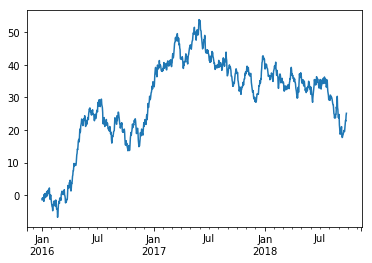

In [168]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2016', periods=1000))
ts = ts.cumsum()
ts.plot()

In [169]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])

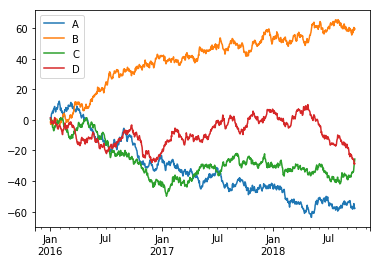

In [170]:
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [171]:
df.to_csv('/tmp/foo.csv')

In [172]:
pd.read_csv('/tmp/foo.csv')

,Unnamed: 0,A,B,C,D
0,2016-01-01,1.109286,-1.347468,0.268175,1.410638
1,2016-01-02,1.263459,-2.856682,0.883745,0.891504
2,2016-01-03,0.853960,-2.114788,0.952458,-0.197388
3,2016-01-04,3.159406,-1.525234,-0.772232,-2.055467
4,2016-01-05,4.188209,-2.424018,-0.004241,-0.801681
5,2016-01-06,4.406160,-2.813794,-0.094093,-1.458215
6,2016-01-07,5.211301,-1.945860,-2.177496,-2.361461
7,2016-01-08,5.722563,-2.183908,-4.793496,-0.980339
8,2016-01-09,5.491612,-3.533750,-4.576744,-1.898163
9,2016-01-10,4.518288,-2.029065,-5.366836,-1.525143


In [173]:
 df.to_hdf('/tmp/foo.h5','df')